In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from epics import ca
from IPython.display import Image, display_png

ca.finalize_libca()

%matplotlib inline

28-ID - VKB Pitch Motor Resolution: 2e-05 deg


**** The executable "caRepeater" couldn't be located
**** because of errno = "No such file or directory".
**** You may need to modify your PATH environment variable.
**** Unable to start "CA Repeater" process.


In [7]:
exp_type = "centroid_fwhm"

In [8]:
# base_dir = Path(aps.__file__).parents[1]
# autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/")
data_base_dir = autoalign_dir / exp_type
print(f"data base dir exists {data_base_dir.exists()}")

data base dir exists True


In [9]:
!ls {data_base_dir}

centroid_fwhm_150_2022-11-18_images
centroid_fwhm_150_2022-11-18_steps
centroid_fwhm_75_2022-11-17.png
centroid_fwhm_autofocusing.ini
centroid_fwhm_optimization_final_150_2022-11-18_13:00.pkl
centroid_fwhm_optimization_final_75_2022-11-17_16:00.pkl
final_setup_2022-11-18.png
initial_setup_2022_11_18.png


### peak_fwhm_150_2022-11-21

In [10]:
!ls {data_base_dir}

centroid_fwhm_150_2022-11-18_images
centroid_fwhm_150_2022-11-18_steps
centroid_fwhm_75_2022-11-17.png
centroid_fwhm_autofocusing.ini
centroid_fwhm_optimization_final_150_2022-11-18_13:00.pkl
centroid_fwhm_optimization_final_75_2022-11-17_16:00.pkl
final_setup_2022-11-18.png
initial_setup_2022_11_18.png


In [11]:
log_file = Path(data_base_dir / "centroid_fwhm_optimization_final_150_2022-11-18_13:00.pkl")
log_file.exists()

True

In [12]:
hist_dir = Path(data_base_dir / "centroid_fwhm_150_2022-11-18_steps")
hist_dir.exists()

True

In [13]:
study = analysis.create_study_from_trials(log_file, n_objectives=2)

[I 2023-05-11 15:42:59,059] A new study created in memory with name: no-name-d01bd988-9f80-4924-a712-fba5fe5a1290


Assuming minimization for all objectives.


In [14]:
n_steps = len(study.trials)

In [15]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension="pkl")

Trial values: centroid_distance 5.975e-03 fwhm 3.937e-02 
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.390024449573547, 'h_fwhm': 0.036416859657251166, 'h_centroid': -0.0036781130971529352, 'h_peak': -0.05430013895321907, 'v_sigma': 0.45698579053964605, 'v_fwhm': 0.01495584212583112, 'v_centroid': 0.00470905253851156, 'v_peak': 0.013980461117623974, 'integral_intensity': 285.98098396737913, 'peak_intensity': 40755.0, 'gaussian_fit': {}}}


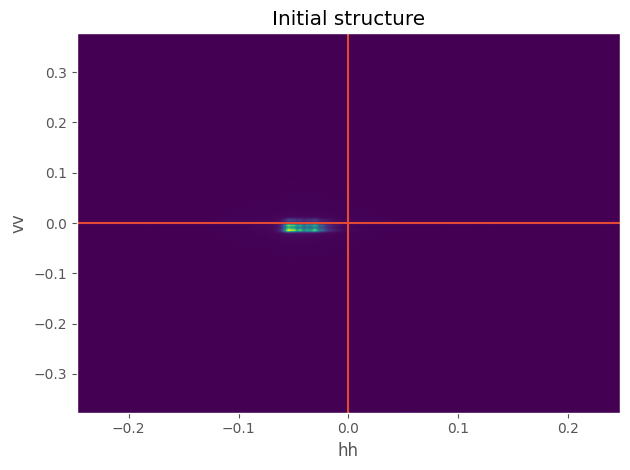

In [208]:
print(f"Trial values: centroid_distance {study.trials[0].values[0]:4.3e} fwhm {study.trials[0].values[1]:4.3e} ")
print("Trial dw:")
print(study.trials[0].user_attrs["dw"].__dict__)


plt.pcolormesh(hists[0].hh[700:-700], hists[0].vv[700:-700], hists[0].data_2D[700:-700, 700:-700].T)
plt.xlabel("hh")
plt.ylabel("vv")
plt.title("Initial structure")
plt.axhline(0)
plt.axvline(0)
plt.tight_layout()
plt.show()

In [17]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [18]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)
print("Actual fwhm (not with reference)", opt_common._get_fwhm_from_dw(nash_trial.user_attrs["dw"]))

[117, 139, 123, 142, 91, 59]
109 [0.0002636314379277681, 0.011504617267917006]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3894961090995303, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.0002517003474366841, 'h_peak': -0.012680870773506308, 'v_sigma': 0.45702302013369284, 'v_fwhm': 0.007803048065651019, 'v_centroid': 7.84121812227867e-05, 'v_peak': 0.0777053536537709, 'integral_intensity': 286.4317739547632, 'peak_intensity': 65324.152, 'gaussian_fit': {}}}
Actual fwhm (not with reference) 0.011504617267917006


Trial number 56
Trial values: peak_distance 1.674e-04 fwhm 1.432e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38980956870986266, 'h_fwhm': 0.009104214914312792, 'h_centroid': 0.00016556015091168108, 'h_peak': -0.0009754515979620237, 'v_sigma': 0.45729028282665457, 'v_fwhm': 0.01105431809300561, 'v_centroid': 2.47902838078351e-05, 'v_peak': 0.07575459163735822, 'integral_intensity': 286.4330459202676, 'peak_intensity': 65343.203, 'gaussian_fit': {}}}
Actual fwhm 0.014320777831785068


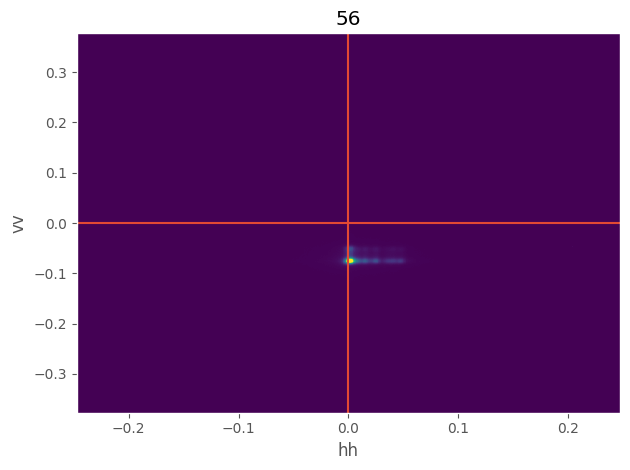

Trial number 100
Trial values: peak_distance 1.962e-04 fwhm 1.199e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3896860590366555, 'h_fwhm': 0.009104214914312792, 'h_centroid': -0.00017546928772624315, 'h_peak': -0.004877257989810118, 'v_sigma': 0.4574281851917597, 'v_fwhm': 0.007803048065651019, 'v_centroid': -8.774229521013588e-05, 'v_peak': 0.08225713169206711, 'integral_intensity': 286.082308198199, 'peak_intensity': 65408.277, 'gaussian_fit': {}}}
Actual fwhm 0.011990591658498573


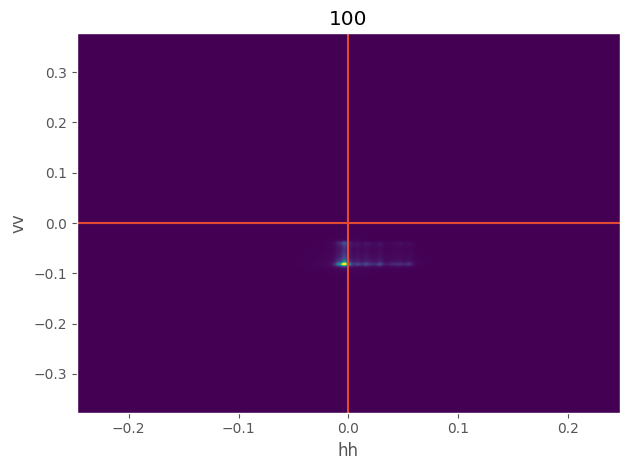

Trial number 105
Trial values: peak_distance 8.256e-04 fwhm 1.150e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3895666052007003, 'h_fwhm': 0.0078036127836966784, 'h_centroid': 0.00037838604609308213, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.4572879366293928, 'v_fwhm': 0.008453302071121938, 'v_centroid': -0.0007337893553190922, 'v_peak': 0.08810941774130515, 'integral_intensity': 286.4684715127203, 'peak_intensity': 65240.55, 'gaussian_fit': {}}}
Actual fwhm 0.011504550768435448


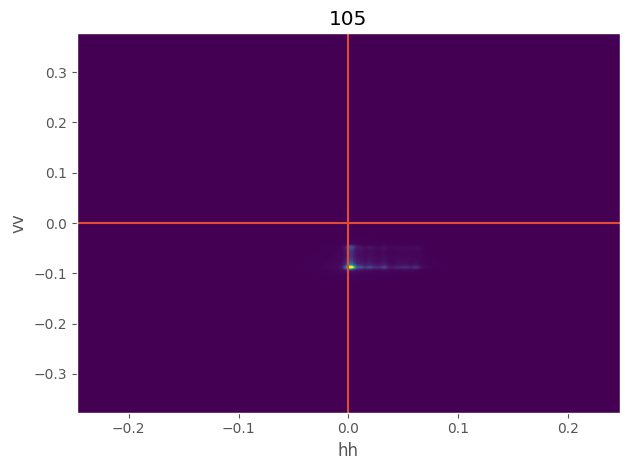

Trial number 109
Trial values: peak_distance 2.636e-04 fwhm 1.150e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.3894961090995303, 'h_fwhm': 0.008453913849004735, 'h_centroid': -0.0002517003474366841, 'h_peak': -0.012680870773506308, 'v_sigma': 0.45702302013369284, 'v_fwhm': 0.007803048065651019, 'v_centroid': 7.84121812227867e-05, 'v_peak': 0.0777053536537709, 'integral_intensity': 286.4317739547632, 'peak_intensity': 65324.152, 'gaussian_fit': {}}}
Actual fwhm 0.011504617267917006


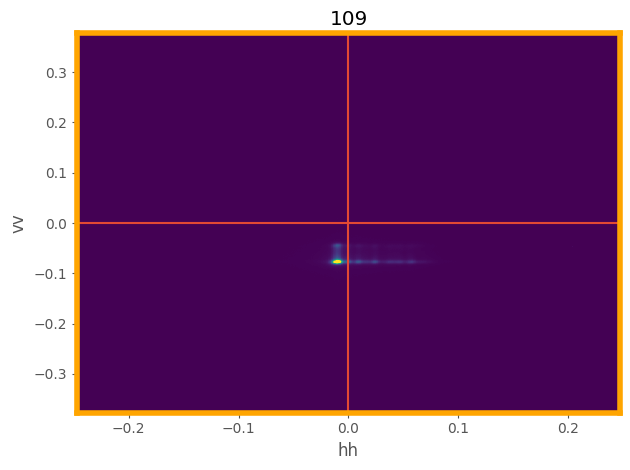

Trial number 112
Trial values: peak_distance 1.482e-03 fwhm 1.107e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38959736652995347, 'h_fwhm': 0.007153311718388622, 'h_centroid': -0.0004947816201363309, 'h_peak': -0.0224353867531264, 'v_sigma': 0.45732763933390963, 'v_fwhm': 0.008453302071121938, 'v_centroid': -0.0013974856960028426, 'v_peak': 0.09656271981242673, 'integral_intensity': 286.3600567507908, 'peak_intensity': 65380.18, 'gaussian_fit': {}}}
Actual fwhm 0.011073761079509997


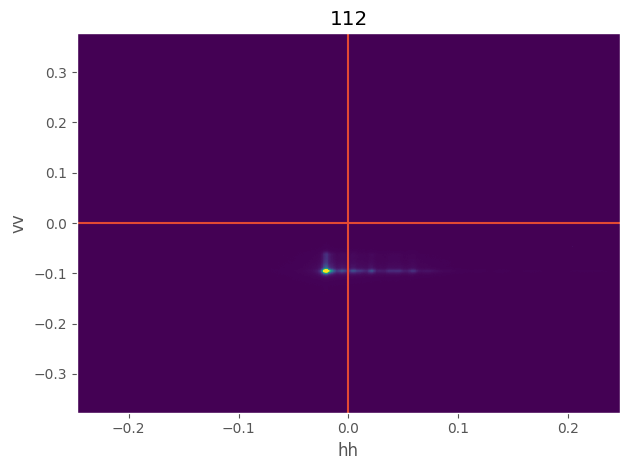

Trial number 150
Trial values: peak_distance 2.678e-03 fwhm 1.059e-02
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.38949076413076616, 'h_fwhm': 0.0078036127836966784, 'h_centroid': -0.0011548052835771982, 'h_peak': -0.024386289949050448, 'v_sigma': 0.4573845044652401, 'v_fwhm': 0.007152794060180101, 'v_centroid': -0.0024162143807168746, 'v_peak': 0.11021805392731535, 'integral_intensity': 286.6947189939313, 'peak_intensity': 65365.195, 'gaussian_fit': {}}}
Actual fwhm 0.010585784588079523


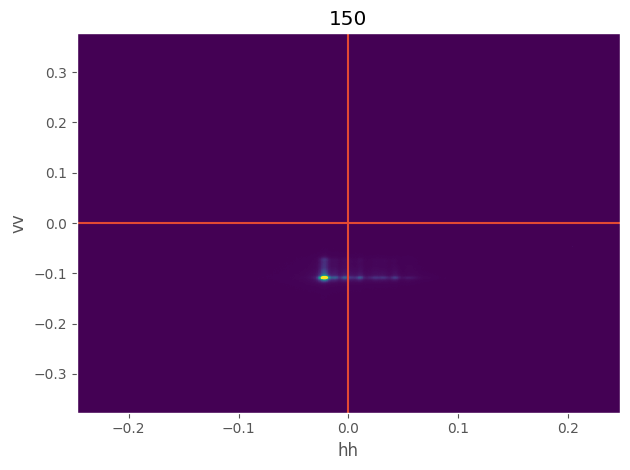

In [209]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} fwhm {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    print("Actual fwhm", opt_common._get_fwhm_from_dw(t.user_attrs["dw"]))
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700, 700:-700].T)
    if t.number == nash_trial.number:
        for axis in ["top", "bottom", "left", "right"]:
            plt.gca().spines[axis].set_linewidth(4)
            plt.gca().spines[axis].set_color("orange")
    plt.xlabel("hh")
    plt.ylabel("vv")
    plt.axhline(0)
    plt.axvline(0)
    plt.title(t.number)
    plt.tight_layout()
    plt.show()

In [25]:
study.best_trials[0].values

[0.00016740585933942582, 0.014320777831785068]

In [26]:
pareto_df = analysis.get_pareto_dataframe_from_study(study, ["centroid", "fwhm"])

In [27]:
pareto_df

number  centroid      fwhm    h_peak    v_peak    h_fwhm    v_fwhm  \
56       56  0.000167  0.014321 -0.000975  0.075755  0.009104  0.011054   
100     100  0.000196  0.011991 -0.004877  0.082257  0.009104  0.007803   
105     105  0.000826  0.011505 -0.000325  0.088109  0.007804  0.008453   
109     109  0.000264  0.011505 -0.012681  0.077705  0.008454  0.007803   
112     112  0.001482  0.011074 -0.022435  0.096563  0.007153  0.008453   
150     150  0.002678  0.010586 -0.024386  0.110218  0.007804  0.007153   

     peak_intensity  
56     65343.203125  
100    65408.277344  
105    65240.550781  
109    65324.152344  
112    65380.179688  
150    65365.195312

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/508936459.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["centroid", "fwhm"], include_dominated_trials=False)


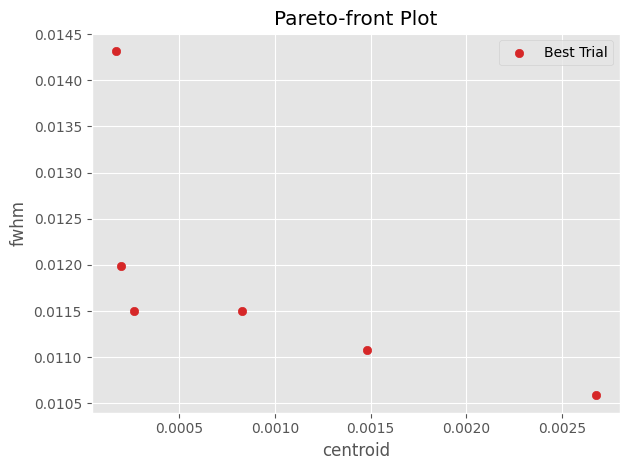

In [28]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(
    study, target_names=["centroid", "fwhm"], include_dominated_trials=False
)
# plt.scatter(*nash_trial.values, color='orange', label='Nash')
plt.legend(loc="best")
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/2220557095.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="centroid")


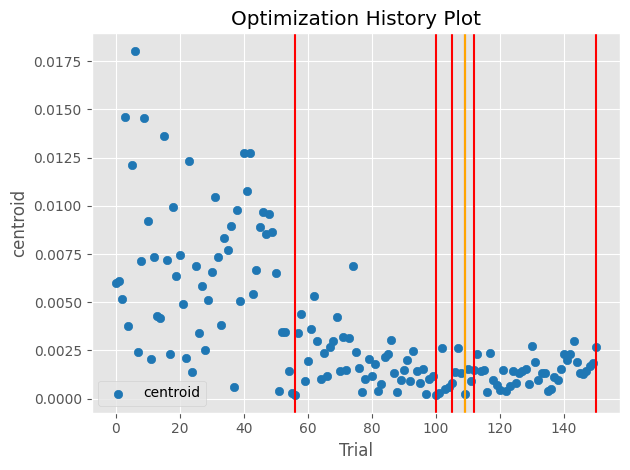

In [29]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="centroid")
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="orange")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/2080699662.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")


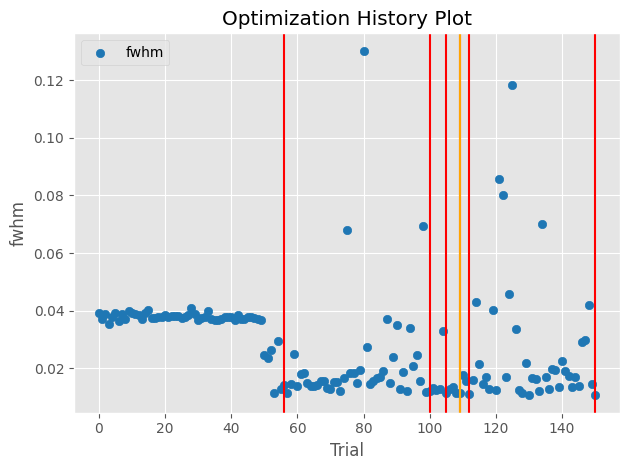

In [30]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="orange")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### The remaining part is just testing how lwsi with thresholding performs in selecting the structures. This is for my own satisfaction. - SK

In [142]:
new_hists = []
new_dws = []
for h in hists:
    h1, dw = analysis.recalculate_info(h, noise_threshold=1.5, crop=500)
    new_hists.append(h1)
    new_dws.append(dw)

In [143]:
wsums = [opt_common._get_weighted_sum_intensity_from_hist(h1, 4) for h1 in new_hists]

In [144]:
wsums = np.array(wsums)

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/436633895.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums[t.number]),


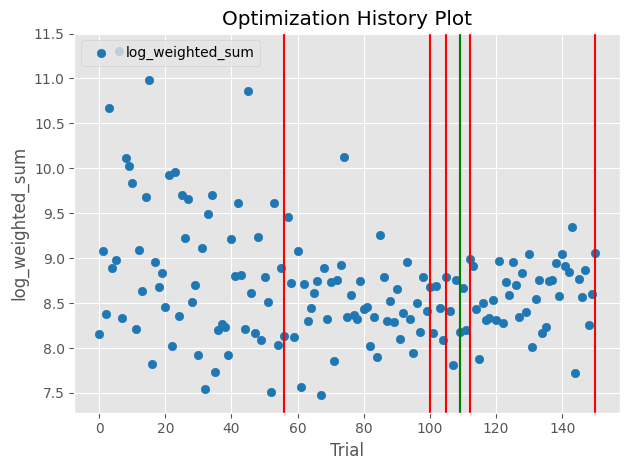

In [145]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(
    study, target=lambda t: np.log(wsums[t.number]), target_name="log_weighted_sum"
)
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="green")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/4268674650.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: sigmas[t.number],


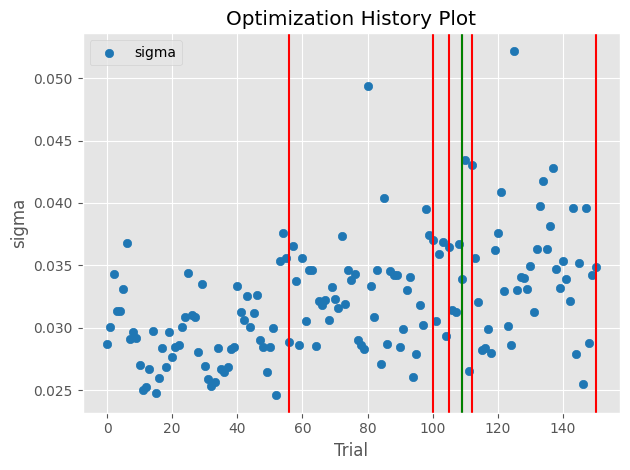

In [146]:
# Plotting the optimization histories
sigmas = [opt_common._get_sigma_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(
    study, target=lambda t: sigmas[t.number], target_name="sigma"
)
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="green")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/3370862287.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: fwhms[t.number],


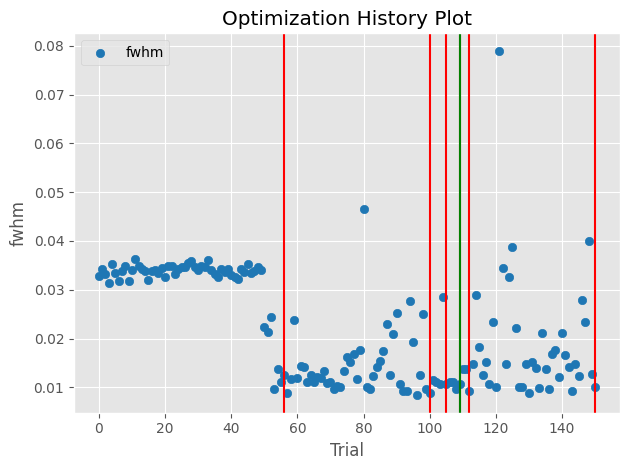

In [147]:
# Plotting the optimization histories
fwhms = [opt_common._get_fwhm_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: fwhms[t.number], target_name="fwhm")
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="green")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/3952178995.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: kl_divs[t.number],


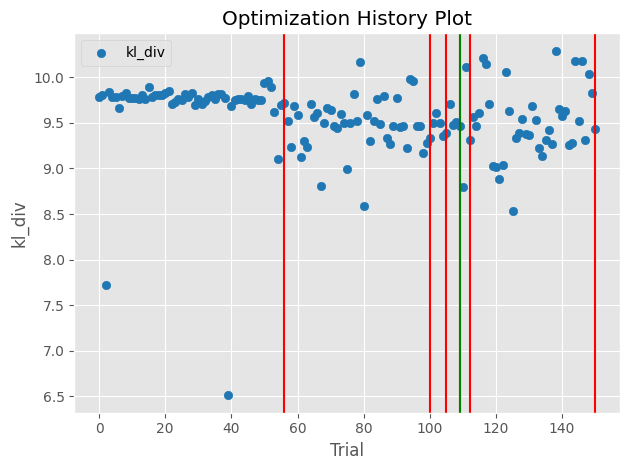

In [214]:
# Plotting the optimization histories
kl_divs = [opt_common._get_kl_divergence_with_gaussian_from_hist(hist, ref_fwhm=(5e-3, 5e-3)) for hist in new_hists]
optuna.visualization.matplotlib.plot_optimization_history(
    study, target=lambda t: kl_divs[t.number], target_name="kl_div"
)
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="green")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/330897592.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: plocs[t.number],


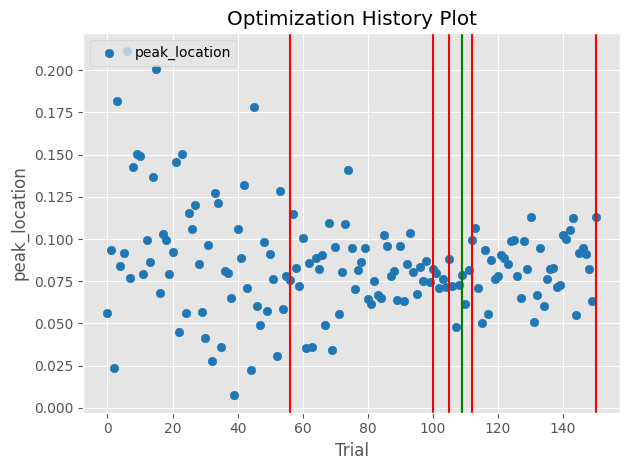

In [235]:
# Plotting the optimization histories
plocs = [opt_common._get_peak_distance_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(
    study, target=lambda t: plocs[t.number], target_name="peak_location"
)
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="green")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_77832/3201353947.py:3: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: pints[t.number],


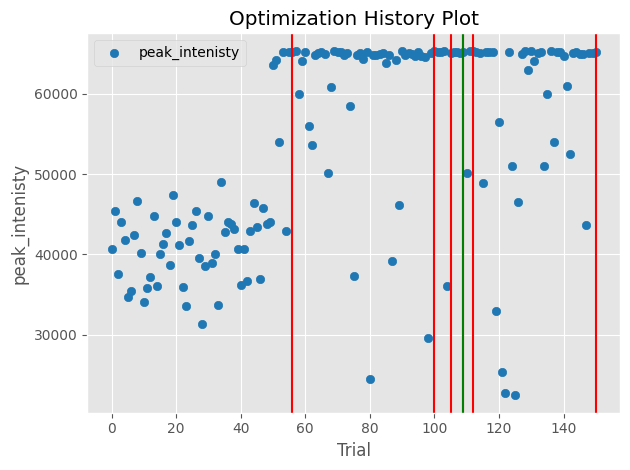

In [236]:
# Plotting the optimization histories
pints = [opt_common._get_peak_intensity_from_dw(dw) for dw in new_dws]
optuna.visualization.matplotlib.plot_optimization_history(
    study, target=lambda t: pints[t.number], target_name="peak_intenisty"
)
for t in study.best_trials:
    plt.axvline(t.number, color="red")
plt.axvline(nash_trial.number, color="green")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [215]:
np.argmin(kl_divs)

39

In [216]:
# FWHM, WSUM

test_val_fns = [lambda t: opt_common._get_fwhm_from_dw(new_dws[t.number]), lambda t: np.log(wsums[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

71 6


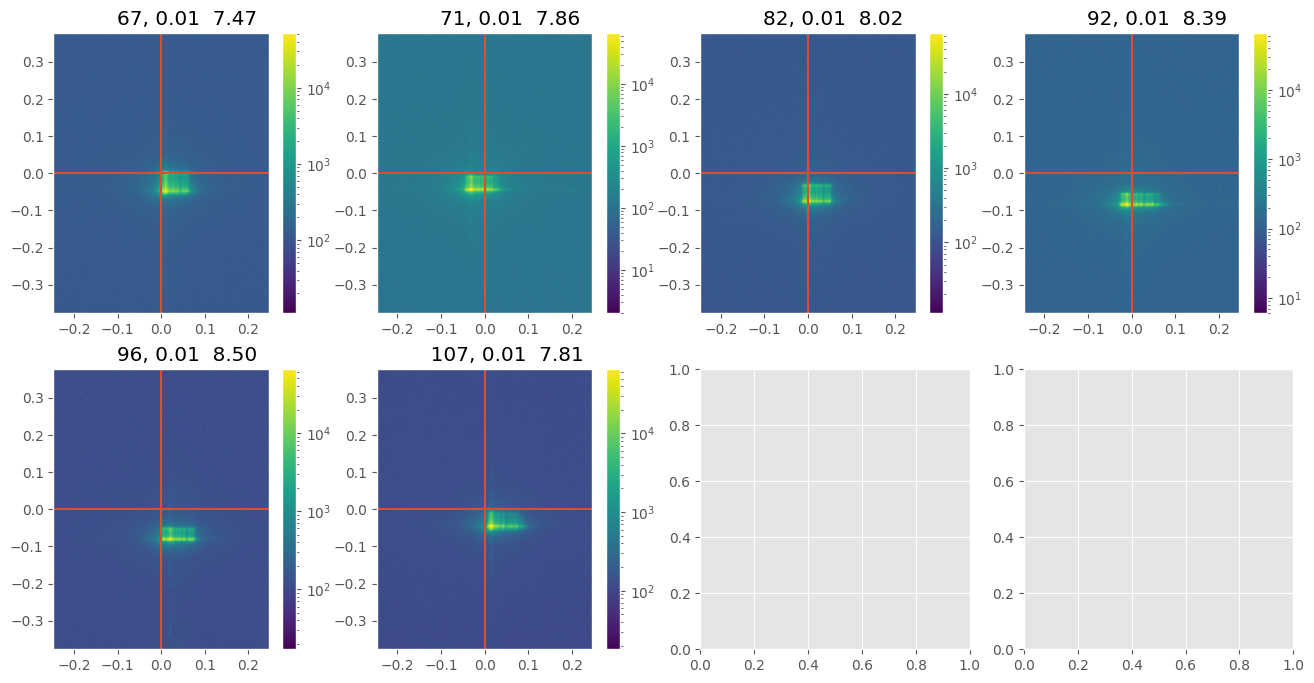

In [217]:
n_rows = np.ceil(len(test_pareto) / 4).astype("int")

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    hdata = hists[t.number]

    cax = axs[i].pcolormesh(
        hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
    )
    axs[i].axvline(0)
    axs[i].axhline(0)

    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [218]:
# FWHM, KL

test_val_fns = [lambda t: opt_common._get_fwhm_from_dw(new_dws[t.number]), lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

93 9


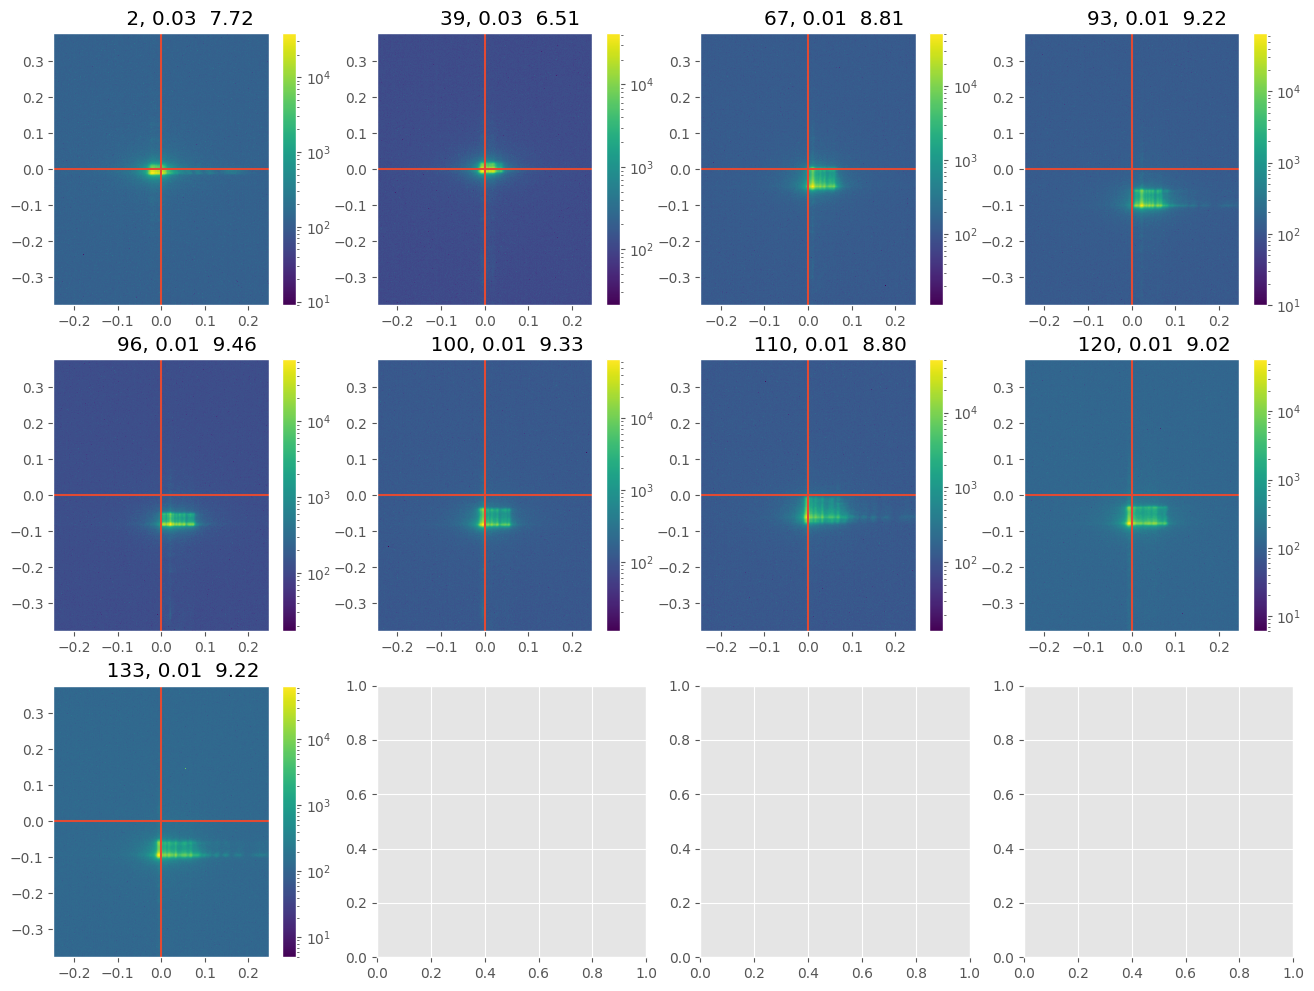

In [219]:
n_rows = np.ceil(len(test_pareto) / 4).astype("int")

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    hdata = hists[t.number]

    cax = axs[i].pcolormesh(
        hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
    )
    axs[i].axvline(0)
    axs[i].axhline(0)

    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [220]:
# centroid, KL

test_val_fns = [lambda t: opt_common._get_centroid_distance_from_dw(new_dws[t.number]), lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

39 1


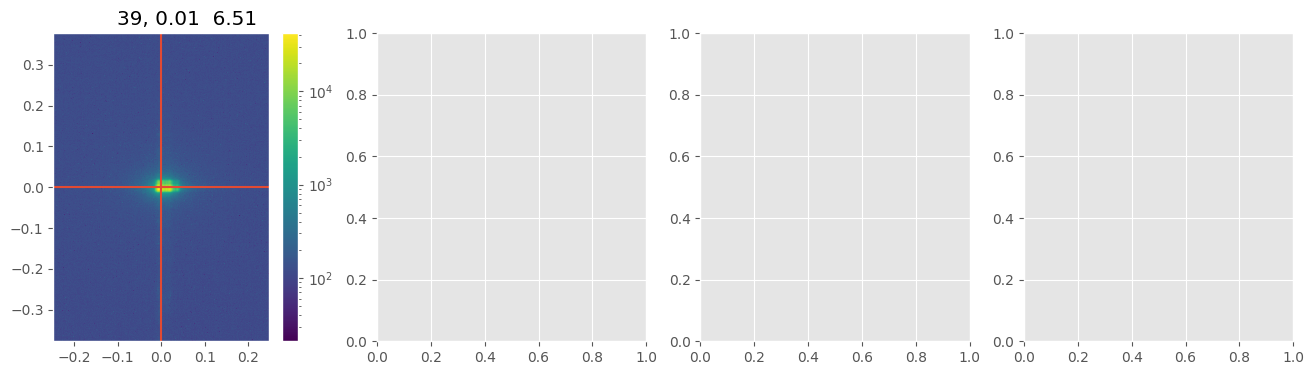

In [221]:
n_rows = np.ceil(len(test_pareto) / 4).astype("int")

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    hdata = hists[t.number]

    cax = axs[i].pcolormesh(
        hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
    )
    axs[i].axvline(0)
    axs[i].axhline(0)

    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [222]:
# peak_location, KL

test_val_fns = [lambda t: opt_common._get_peak_distance_from_dw(new_dws[t.number]), lambda t: kl_divs[t.number]]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

39 1


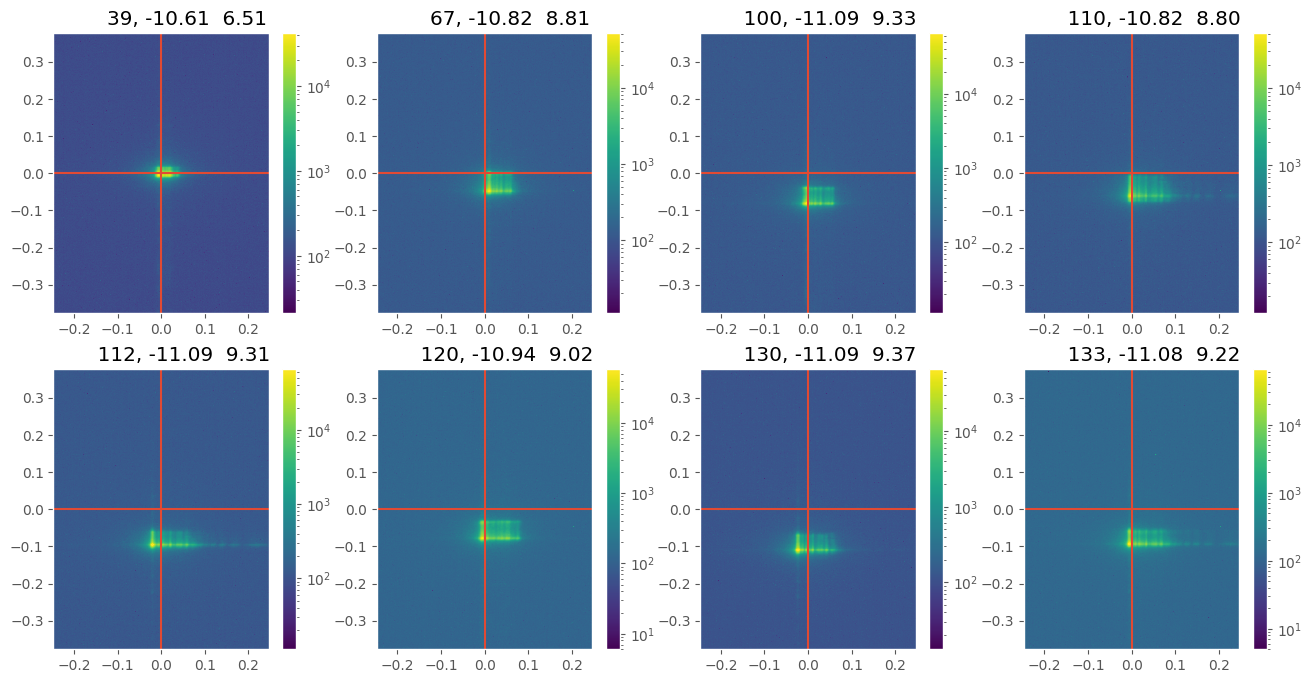

In [229]:
n_rows = np.ceil(len(test_pareto) / 4).astype("int")

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    hdata = hists[t.number]

    cax = axs[i].pcolormesh(
        hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
    )
    axs[i].axvline(0)
    axs[i].axhline(0)

    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [230]:
# peak_intensity, KL

test_val_fns = [
    lambda t: -np.log(opt_common._get_peak_intensity_from_dw(new_dws[t.number])),
    lambda t: kl_divs[t.number],
]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

130 8


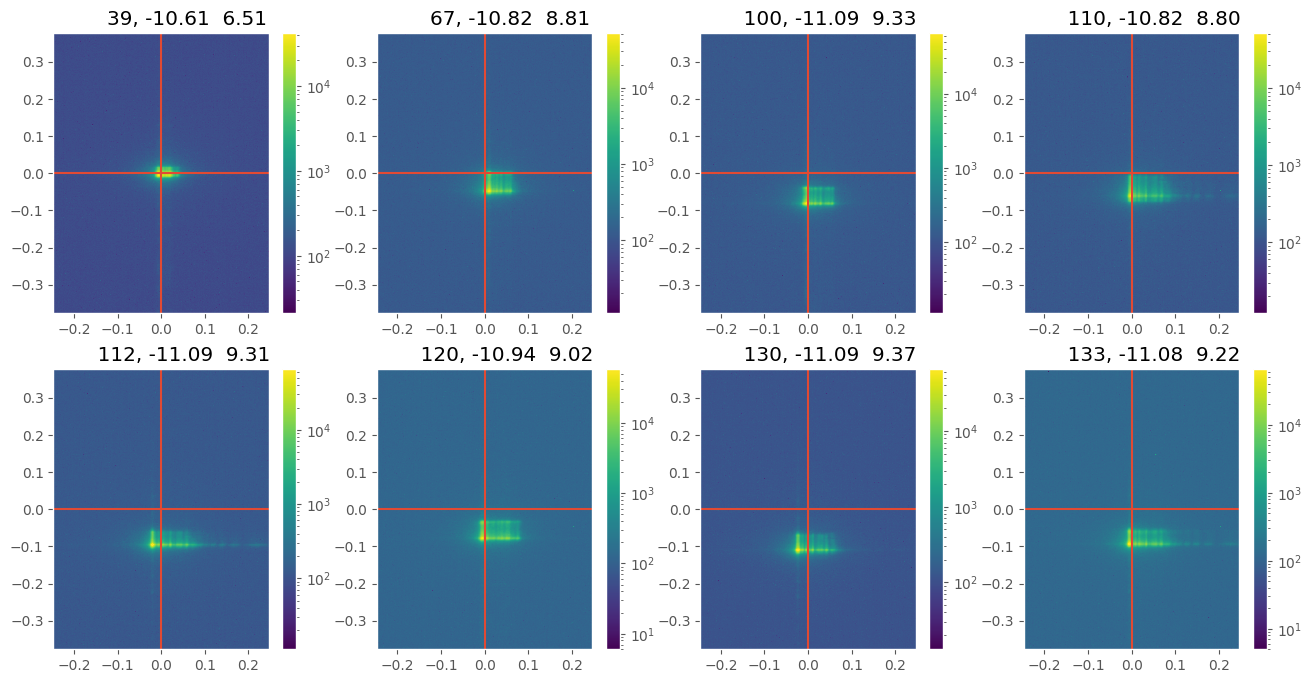

In [231]:
n_rows = np.ceil(len(test_pareto) / 4).astype("int")

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    hdata = hists[t.number]

    cax = axs[i].pcolormesh(
        hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
    )
    axs[i].axvline(0)
    axs[i].axhline(0)

    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

In [232]:
# peak_intensity, peak_location, KL

test_val_fns = [
    lambda t: -np.log(opt_common._get_peak_intensity_from_dw(new_dws[t.number])),
    lambda t: opt_common._get_peak_distance_from_dw(new_dws[t.number]),
    lambda t: kl_divs[t.number],
]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1, 1], test_val_fns)
print(np.argmax(domins), len(test_pareto))

71 22


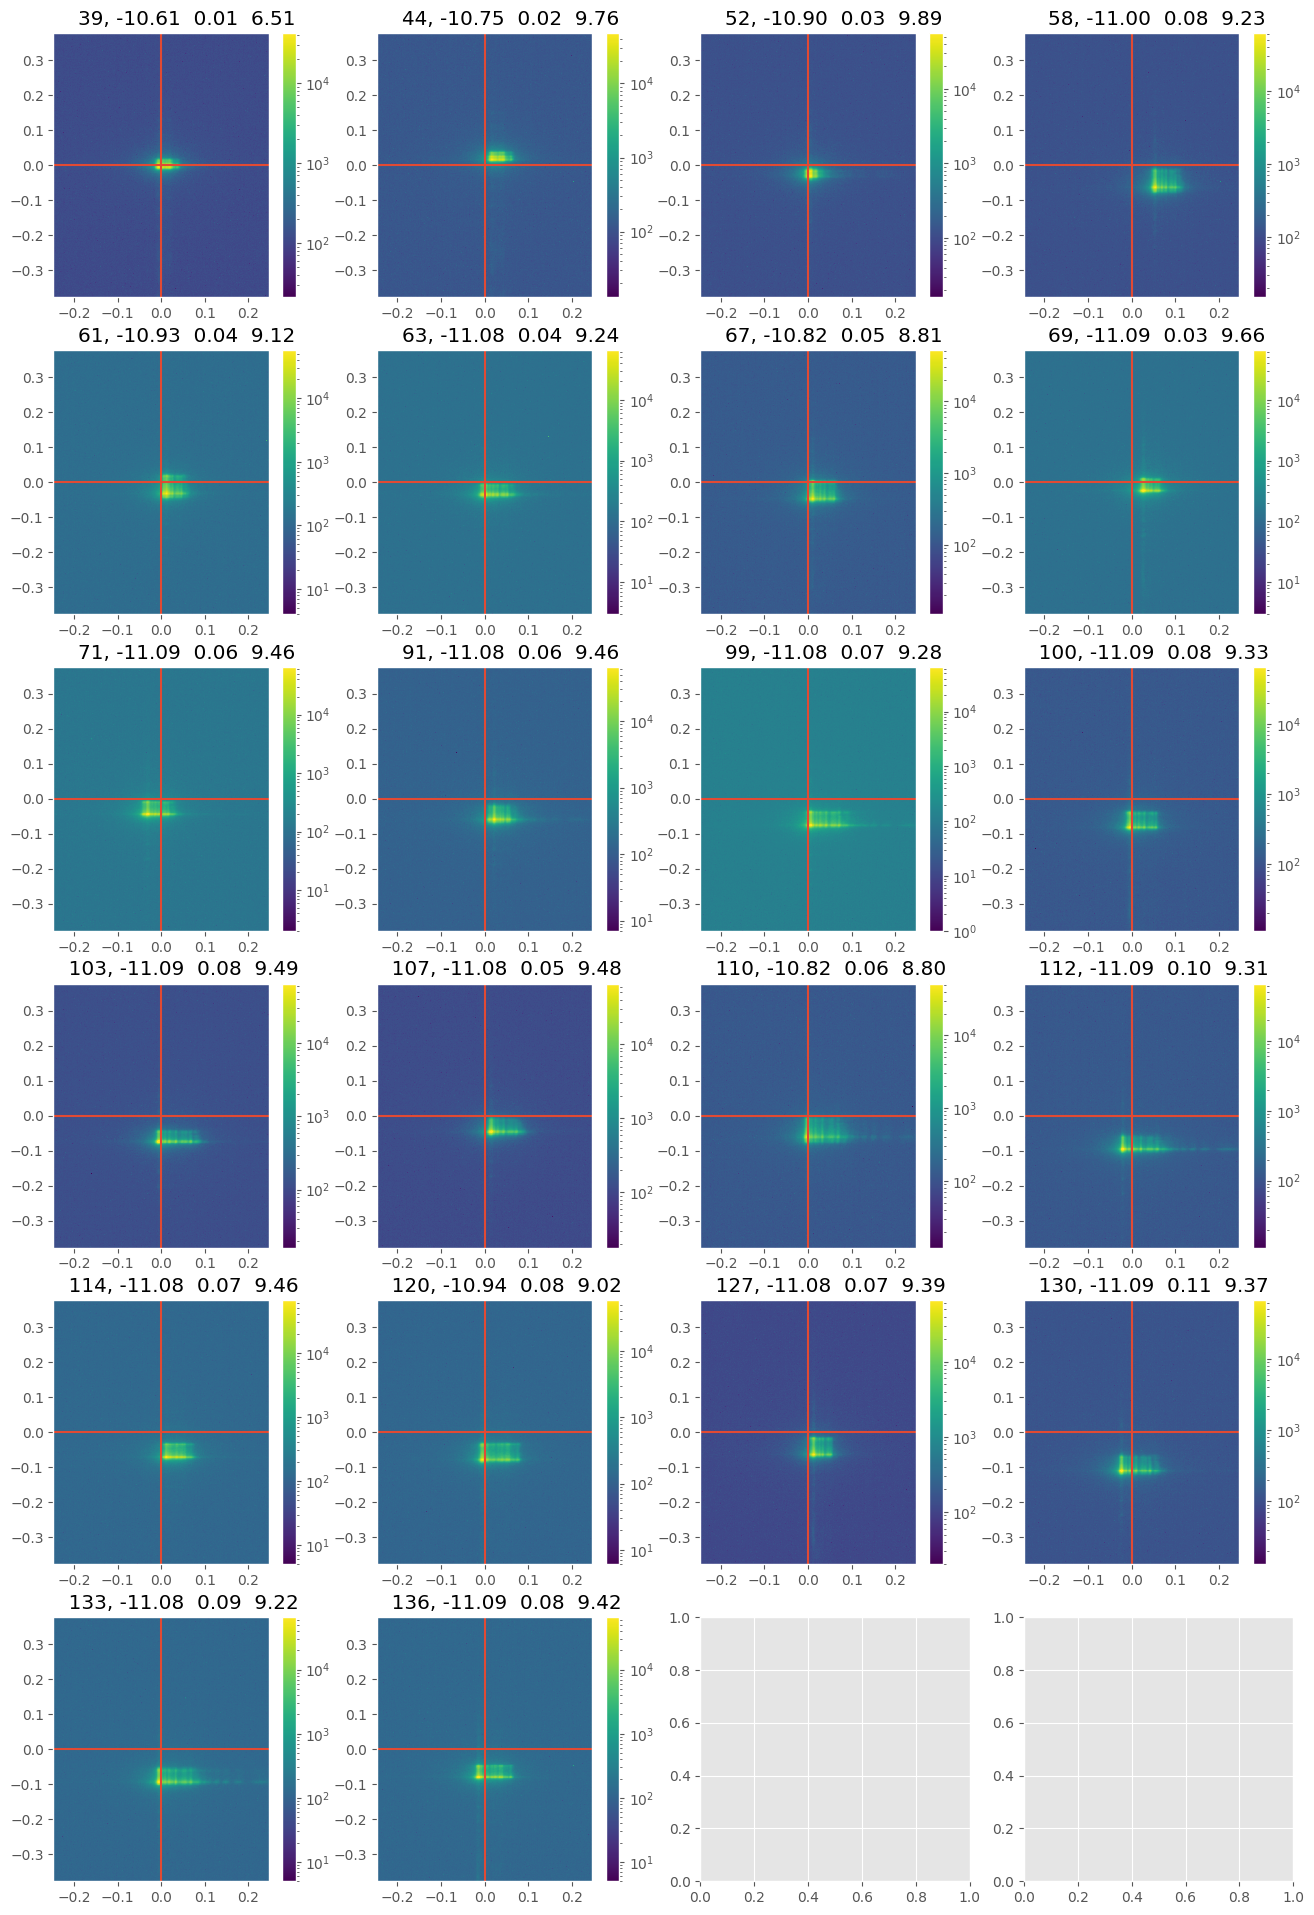

In [234]:
n_rows = np.ceil(len(test_pareto) / 4).astype("int")

fig, axs = plt.subplots(n_rows, 4, figsize=[16, n_rows * 4])
axs = axs.ravel()

for i, t in enumerate(test_pareto):
    hdata = hists[t.number]

    cax = axs[i].pcolormesh(
        hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
    )
    axs[i].axvline(0)
    axs[i].axhline(0)

    val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[t.number]])
    axs[i].set_title(f"{t.number:>10}, {val_strs}")
    plt.colorbar(cax, ax=axs[i])
plt.show()

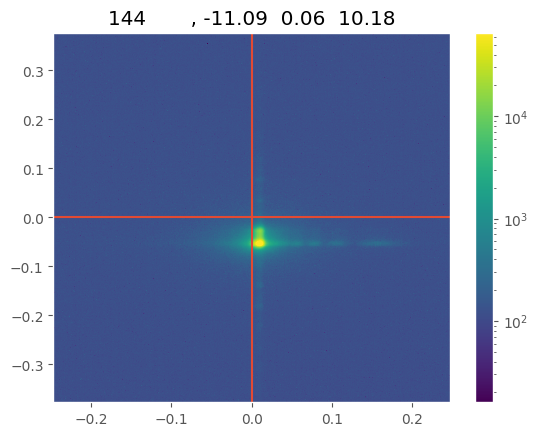

In [249]:
tnum = 144
hdata = hists[tnum]
fig, ax = plt.subplots(1, 1)

cax = plt.pcolormesh(
    hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
)
plt.axvline(0)
plt.axhline(0)

val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[tnum]])
ax.set_title(f"{tnum:<6} {val_strs}")
plt.colorbar(cax, ax=ax)
plt.show()

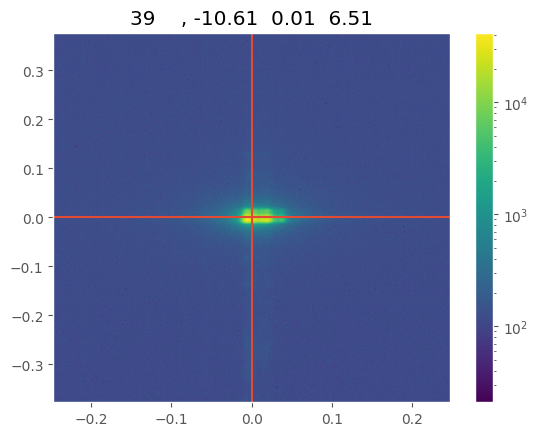

In [250]:
tnum = 39
hdata = hists[tnum]
fig, ax = plt.subplots(1, 1)

cax = plt.pcolormesh(
    hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
)
plt.axvline(0)
plt.axhline(0)

val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[tnum]])
ax.set_title(f"{tnum:<6}, {val_strs}")
plt.colorbar(cax, ax=ax)
plt.show()

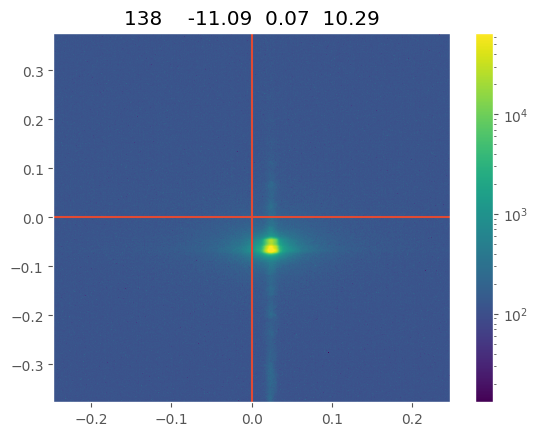

In [252]:
tnum = 138
hdata = hists[tnum]
fig, ax = plt.subplots(1, 1)

cax = plt.pcolormesh(
    hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T, norm=mpl.colors.LogNorm()
)
plt.axvline(0)
plt.axhline(0)

val_strs = "  ".join([f"{tval:3.2f}" for tval in test_values[tnum]])
ax.set_title(f"{tnum:<6} {val_strs}")
plt.colorbar(cax, ax=ax)
plt.show()

In [100]:
test_val_fns = [
    lambda t: opt_common._get_peak_distance_from_dw(new_dws[t.number]),
    lambda t: opt_common._get_sigma_from_dw(new_dws[t.number]),
    lambda t: np.log(wsums[t.number]),
]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

144 133


2 [0.023415039905992783, 0.014803121767976896, -3.9974369031337202]


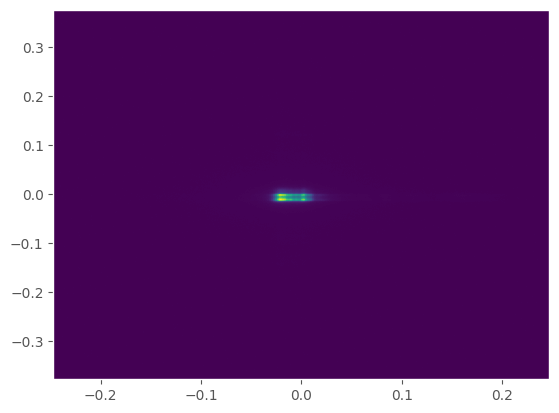

32 [0.02789729221231127, 0.015389017631372438, -8.62904568467053]


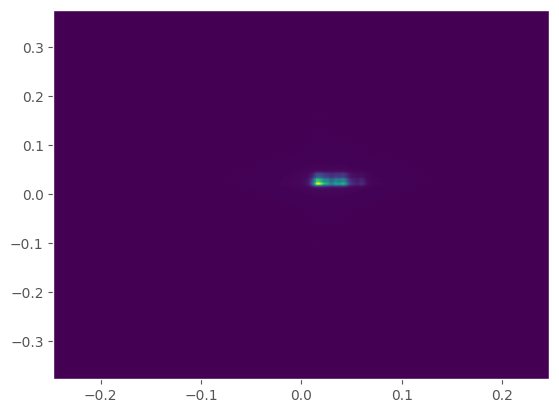

35 [0.036020888403470244, 0.015256824139993519, -4.204502593148971]


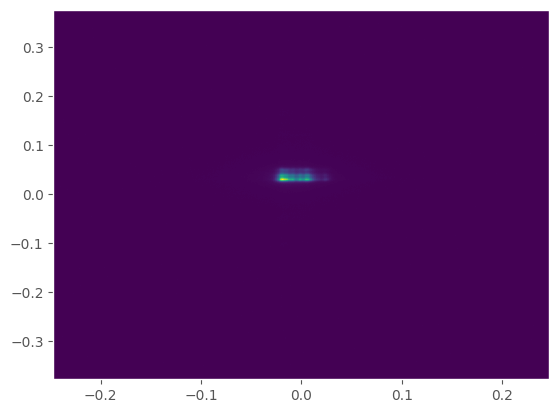

39 [0.007371438929209008, 0.015257148734621834, -4.1353366762753545]


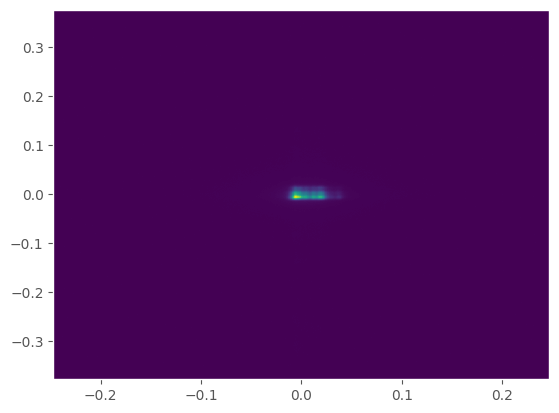

52 [0.030861476155581536, 0.012527157095196376, -2.9862805368962477]


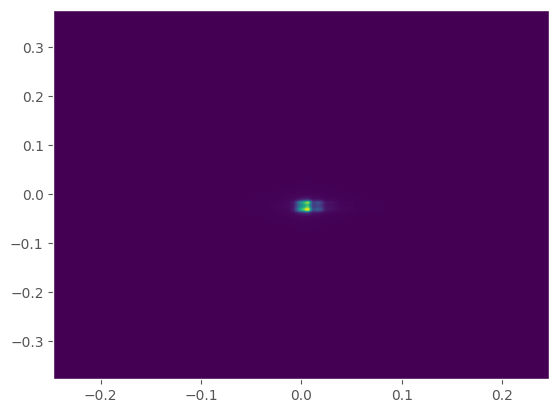

138 [0.07178360364219727, 0.010682867294200576, -4.111634436666509]


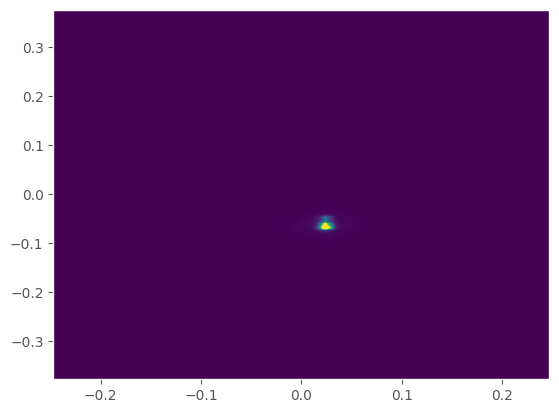

144 [0.05529267404168752, 0.012110474561813129, -8.578703098875216]


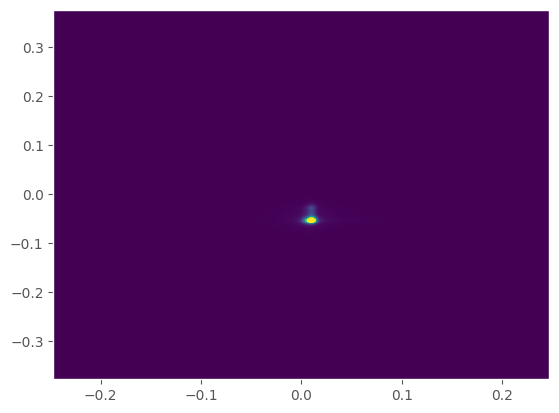

In [101]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]

    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T)
    plt.show()

In [102]:
test_val_fns = [lambda t: opt_common._get_sigma_from_dw(new_dws[t.number]), lambda t: np.log(wsums[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1, 1], test_val_fns)
print(np.argmax(domins))

144


32 [0.015389017631372438, -8.62904568467053]


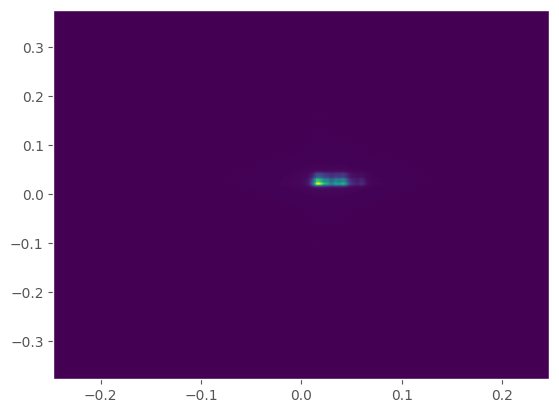

138 [0.010682867294200576, -4.111634436666509]


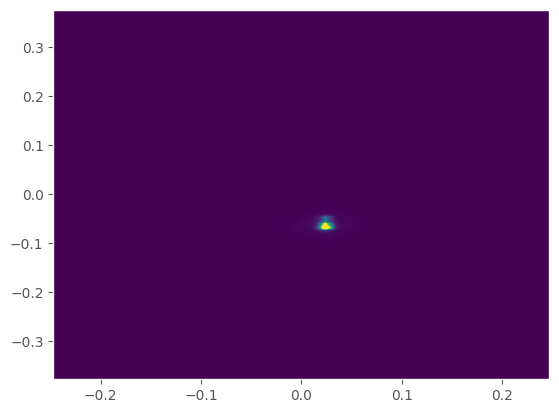

144 [0.012110474561813129, -8.578703098875216]


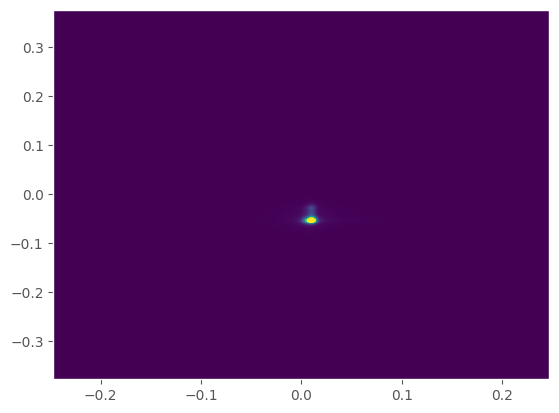

In [103]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]

    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:, None], hdata.data_2D[700:-700, 700:-700].T)
    plt.show()